In [ ]:
import numpy as np

def read_elnes_file(filename):
    energies = []
    real_parts = []
    imag_parts = []
    data_started = False

    with open(filename, 'r') as file:
        for line in file:
            # Detect start of numerical data
            if line.strip().startswith("##  Energy, Re"):
                data_started = True
                continue
            if data_started:
                if line.strip() == "":
                    continue
                try:
                    parts = line.split()
                    energy = float(parts[0])
                    real = float(parts[1])
                    imag = float(parts[2])
                    energies.append(energy)
                    real_parts.append(real)
                    imag_parts.append(imag)
                except (ValueError, IndexError):
                    # Skip lines that don't match expected format
                    pass

    return np.array(energies), np.array(real_parts), np.array(imag_parts)

# Example usage
path = r"D:\school\AP MEP\eelsdata_wien2k\0deg\monolayer.elnes"
energies, real_spectrum, imag_spectrum = read_elnes_file(path)


PermissionError: [Errno 13] Permission denied: 'C:\\Users\\bartv\\OneDrive\\Documents\\AP Master Thesis\\WIEN2k\\hBN monolayer\\eelsdata_wien2k'

<>:37: SyntaxWarning: invalid escape sequence '\c'
<>:37: SyntaxWarning: invalid escape sequence '\c'
C:\Users\bartv\AppData\Local\Temp\ipykernel_16060\2532909751.py:37: SyntaxWarning: invalid escape sequence '\c'
  plt.xlabel("Monolayer tilt angle ($^\circ$)")


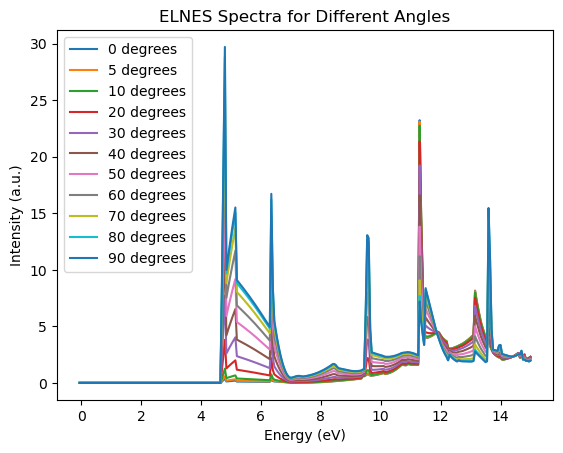

[29.81398209  1.        ]


C:\Users\bartv\AppData\Local\Temp\ipykernel_16060\2532909751.py:32: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(fit, wien_telnes3_runs_angles, array)


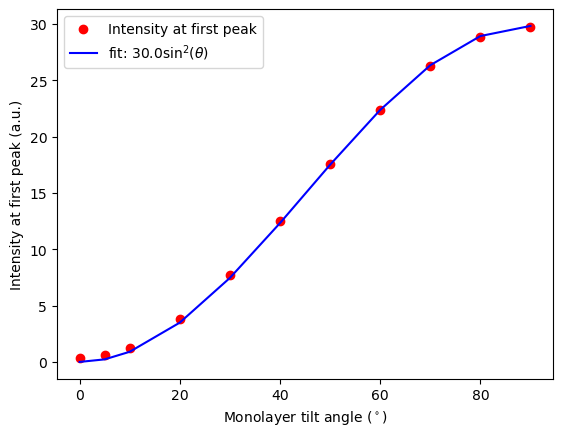

In [52]:
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

wien_telnes3_runs_angles= [0,5,10,20,30,40,50,60,70,80,90]

path = fr'C:\Users\bartv\OneDrive\Documents\AP Master Thesis\WIEN2k\hBN monolayer\eelsdata_wien2k\{90}deg\monolayer.elnes'
energies, real_spectrum, imag_spectrum = read_elnes_file(path)
argmax = np.argmax(real_spectrum)
array = []
for angle in wien_telnes3_runs_angles[:]:
    path = fr'C:\Users\bartv\OneDrive\Documents\AP Master Thesis\WIEN2k\hBN monolayer\eelsdata_wien2k\{angle}deg\monolayer.elnes'
    energies, real_spectrum, imag_spectrum = read_elnes_file(path)
    # Apply Gaussian filter to smooth the spectrum
    # real_spectrum = gaussian_filter1d(real_spectrum, sigma=5)
    array.append(real_spectrum[argmax])
    plt.plot(energies, real_spectrum, label=f"{angle} degrees")


plt.xlabel("Energy (eV)")
plt.ylabel("Intensity (a.u.)")
plt.title("ELNES Spectra for Different Angles")
plt.legend()
plt.show()

import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

def fit(x, a, b):
    return a * (np.sin(np.radians(x)))**2

popt, pcov = curve_fit(fit, wien_telnes3_runs_angles, array)
print(popt)

plt.scatter(wien_telnes3_runs_angles, array, label="Intensity at first peak", c="red")
plt.plot(wien_telnes3_runs_angles, fit(wien_telnes3_runs_angles, *popt), label=f"fit: {round(popt[0], 0)}sin$^2$($\\theta$)", c="blue")
plt.xlabel("Monolayer tilt angle ($^\circ$)")
plt.ylabel("Intensity at first peak (a.u.)")
plt.legend()